<a href="https://colab.research.google.com/github/rgmantovani/advancedML/blob/master/codes/aula_03_cnns/CNN_Keras_example1_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso de Redes Neurais Convolucionais (*Convolutional Neural Networks - CNN*)

Disciplina: Métodos e Modelos Avançados em Ciência de Dados

Especialização em Ciência de Dados - Universidade Tecnologica Federal do Paraná

Aula 03: CNNs

Exemplo 01: Executando CNN para problema CIFAR-10

---


Começaremos nosso exemplo teste fazendo a requisição dos pacotes que necessitamos para manipular os modelos de Aprendizado Profundo (*Deep Learning - DL*), no caso as CNNs. Iremos fazer uso de um pacote em especial:
* **keras** - wrapper em R das implementações de DL em Python.

Links externos: 

* Keras: https://keras.io

* keras - pacote R: https://cran.r-project.org/web/packages/kerasR/vignettes/introduction.html


In [4]:
# Caso o pacote keras não exista, ele será instalado
mat = installed.packages("keras")  #lista todos os pacotes instalados no ambiente
if(!"keras" %in% rownames(mat)) {
  install.packages("keras")        #instala se ele nao tiver sido instalado anteriormente
}

# Carregando o pacote keras para R
library("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#1 - Selecionar um conjunto de dados 

Iremos trabalhar com um conjunto de dados (*dataset*) composto por imagens. O dataset selecionado para esse exemplo é o [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). Este dataset é composto por 
60 mil imagens, cuja resolução é 32 x 32, dividas em 10 categorias, incluindo imagens de objetos e animais. As 10 categorias existentes no CIFAR-10 são:
* classes = {avião, automóvel, pássaro, gato, veado, cachorro, sapo, cavalo, navio, e caminhão}.

In [5]:
# carregar o dataset CIFAR-10 do pacote keras
cifar = keras::dataset_cifar10()

Além do cifar, existem outros dataset já pré-carregados no pacote:'dataset_boston_housing()', 'dataset_cifar100()'; 'dataset_fashion_mnist()', 'dataset_imdb()', 'dataset_mnist()', 'dataset_reuters()'.

Dentro variável ```cifar``` teremos quatro conjuntos de dados:
* ```train$x```: conjunto de treinamento e seus respectivos atributos descritivos (pixels de cada imagem);
* ```test$y```: labels do conjunto de treinamento;
* ```train$x```: conjunto de teste e seus respectivos atributos descritivos;
* ```test$y```: labels do conjunto de teste.

Os conjuntos 'x' são arrays de imagens em RGB com dimensão: (num_samples, 32, 32, 3). Já os conjuntos 'y' são arrays categóricos com valores de 0-9, no tamanho (num_samples).


In [4]:
# Conjunto de treinamento (train$x)
# 50000 imagens no conjunto de treinamento, 32x32, 3 canais de cores (matrizes R, G, B)
str(cifar$train$x)

 int [1:50000, 1:32, 1:32, 1:3] 59 154 255 28 170 159 164 28 134 125 ...


In [5]:
# Tentando ver a informação de uma imagem
# imagem 1 - canal R - 0 - 255
#print(cifar$train$x[1,,,1])
# imagem 1 - canal G 0 - 255
print(cifar$train$x[1,,,2])
# imagem 1 - canal B 0 - 255
#print(cifar$train$x[1,,,3])


      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]   62   46   48   54   73   91  107  110  117   120   103    99   115
 [2,]   20    0    8   27   51   82   89   86   87    79    70    67    70
 [3,]   24    7   27   50   72   92   93   82   77    78    79    75    73
 [4,]   25   20   54   63   70   74   72   62   68    84    90    75    77
 [5,]   32   32   65   79   77   77   78   74   72    88    89    68    71
 [6,]   48   53   73   82   88   84   84   77   70    82    81    65    72
 [7,]   69   75   85   84   88   83   74   74   83    94    79    79    71
 [8,]   82   76   90   97   88   81   90   89   86    89    91    70    39
 [9,]  100   82   91   87   81   82   85   85   80    97    94    42    25
[10,]  120  112  114  100   89   86   86   91   97    97    60    35    33
[11,]  122  117  117  108  100  100  102  102  111    87    40    53    45
[12,]  114  109  109   97   92   94   84   74  103    83    60    86    78
[13,]  115  106  105  105

In [6]:
# Rotulos do conjunto de treinamento (train$x) 
str(cifar$train$y)

 int [1:50000, 1] 6 9 9 4 1 1 2 7 8 3 ...


In [7]:
# vendo a distribuição de valores das classes no conjunto de treinamento
table(cifar$train$y)


   0    1    2    3    4    5    6    7    8    9 
5000 5000 5000 5000 5000 5000 5000 5000 5000 5000 

Algumas características do dataset carregado:


In [8]:
str(cifar$test$x)

 int [1:10000, 1:32, 1:32, 1:3] 158 235 158 155 65 179 160 83 23 217 ...


Os correspondetes nomes das classes são:

In [6]:
class_names = c('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(class_names)

 [1] "airplane"   "automobile" "bird"       "cat"        "deer"      
 [6] "dog"        "frog"       "horse"      "ship"       "truck"     


#2 - Visualizar nossos dados

Vamos iniciar nossa nossa epxloração visualizando um exemplo de imagem do conjunto de treinamento usando o pacote [imager](https://dahtah.github.io/imager/imager.html).


In [7]:
if(!"imager" %in% rownames(mat)) {
  install.packages("imager")        #instala se ele nao tiver sido instalado anteriormente
}
library("imager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bmp’, ‘tiff’, ‘jpeg’, ‘readbitmap’, ‘downloader’, ‘igraph’


Loading required package: magrittr


Attaching package: ‘imager’


The following object is masked from ‘package:magrittr’:

    add


The following objects are masked from ‘package:stats’:

    convolve, spectrum


The following object is masked from ‘package:graphics’:

    frame


The following object is masked from ‘package:base’:

    save.image




Warning message in as.cimg.array(cifar$train$x[image.number, , , ]):
“Assuming third dimension corresponds to colour”


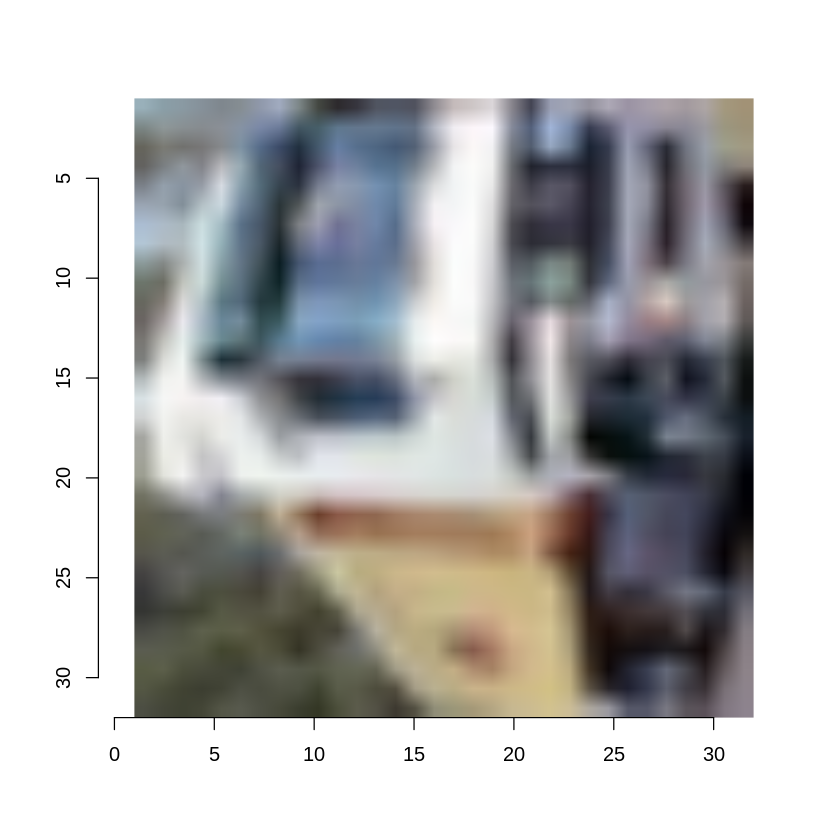

In [8]:
# id da imagem que queremos visualizar
image.number = 2

# convertemos o array 4D para um objeto de imagem
example = as.cimg(cifar$train$x[image.number,,,])

# plotando a imagem
plot(example) # já é capaz de ver a imagem, mas não agrada visualmente

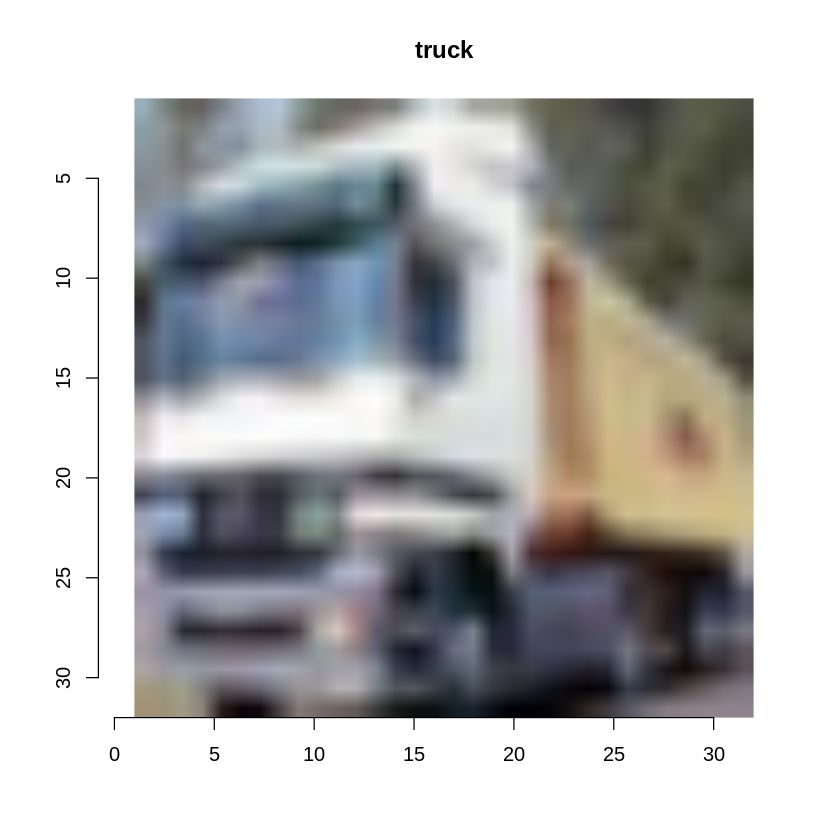

In [9]:
# comandos para manipular a imagem e vermos de forma agradável :)
imrotate(example,90) %>% mirror("x") %>% plot(main=class_names[cifar$train$y[image.number] + 1])


Podemos tentar visualizar um pouco mais dos dados que estamos manipulando. Logo, seria interessante "ver" estas imagens e como elas diferem entre si (classes). Como temos 50 mil exemplos no conjunto de treinamento vamos selecionar um pequeno subconjunto de 30 imagens e verificar os seus respectivos rótulos (labels/classes).

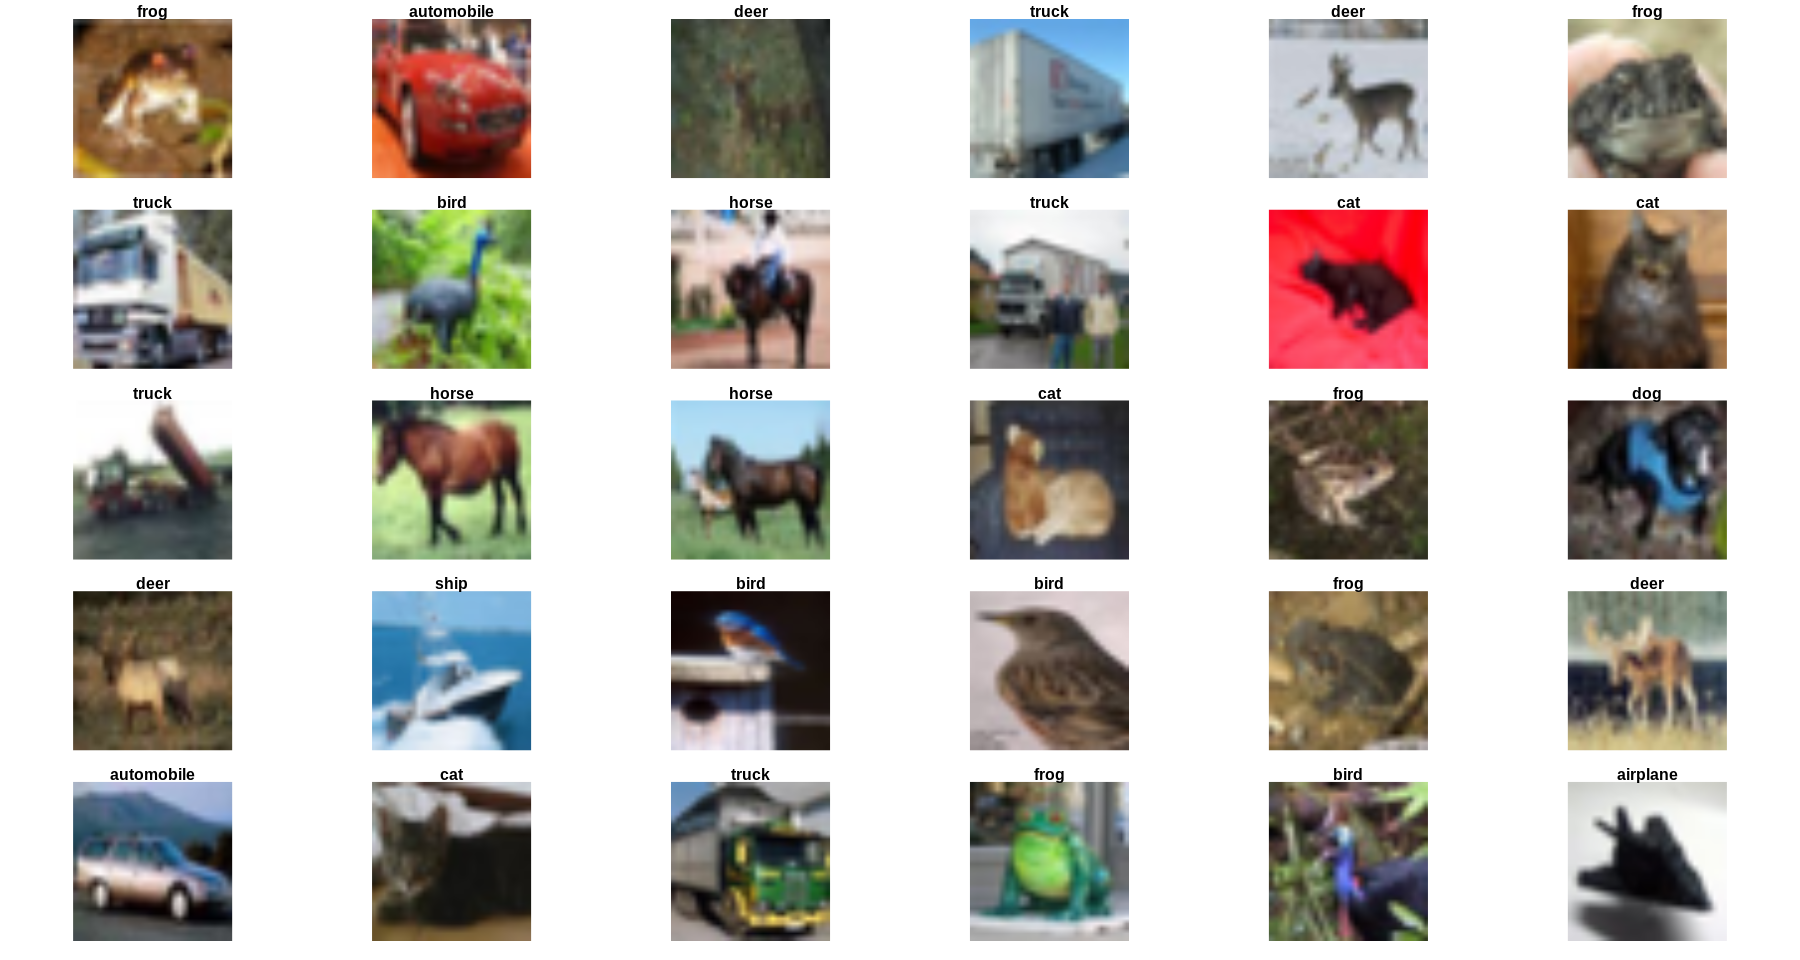

In [10]:
# selecionaremos 30 imagens
index = 1:30
#index = 31:60
#...

options(repr.plot.width=15, repr.plot.height=8)

# e as mostraremos em um grid 5 x 6 - 5 linhas, 6 colunas
par(mfcol = c(5,6), mar = rep(1, 4), oma = rep(0.2, 4))
cifar$train$x[index,,,] %>% 
  purrr::array_tree(1) %>%
  purrr::set_names(class_names[cifar$train$y[index] + 1]) %>% 
  purrr::map(as.raster, max = 255) %>%
  purrr::iwalk(~{plot(.x); title(.y)})

# a resolução delas é baixa mesmo :/ imagens 28x28 não contem muita informação 
# visual logo, está tudo certo

Seria interessante analisar também qual é a distribução das classes do problema. Podemos entãogerar um histograma para verificar a frequência de cada uma das classes, tanto no conjunto de treiamento (```q1```) como no conjunto de teste (```q2```).

In [12]:
# gráfico com a distribuição das classes
library('ggplot2')

if(!"gridExtra" %in% rownames(mat)) {
  install.packages("gridExtra")        #instala se ele nao tiver sido instalado anteriormente
}
library('gridExtra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



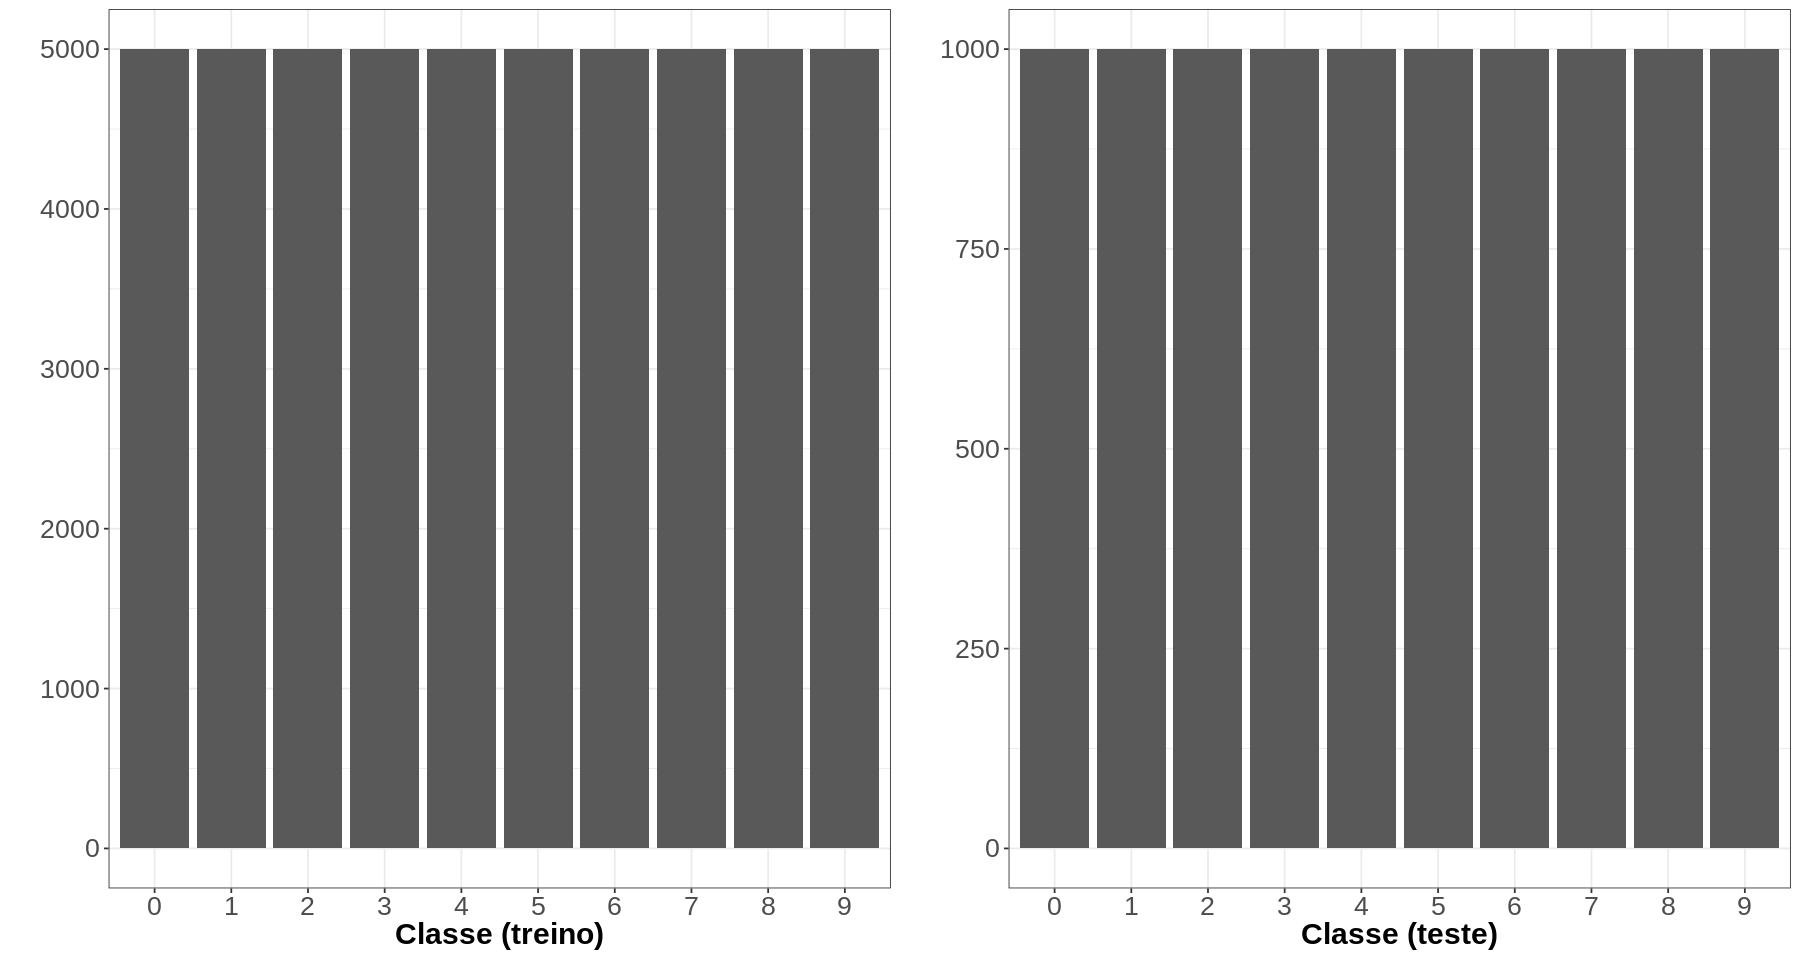

In [13]:
# histograma das classes no conjunto de treinamento
q1 = qplot(as.factor(cifar$train$y)) + theme_bw() + xlab("Classe (treino)")
q1 = q1 + theme(axis.text=element_text(size=16),
        axis.title=element_text(size=18,face="bold"))

# histograma das classes no conjunto de teste
q2 = qplot(as.factor(cifar$test$y)) + theme_bw() + xlab("Classe (teste)")
q2 = q2 + theme(axis.text=element_text(size=16),
        axis.title=element_text(size=18,face="bold"))

# plot duplo (treino - teste)
options(repr.plot.width=15, repr.plot.height=8)
gridExtra::grid.arrange(q1, q2, ncol=2)

Podemos ver que ambos os cojuntos, treino (esquerda) e teste (direita) são balanceados, ou seja, há a mesma quantidade de exemplos de classes distintas. O que é bom, indicando que temos um bom split de dados para indução e avaliação do modelo.

#3 - Criando um modelo de CNN

Da mesma forma que trabalhamos com as MLPs, vamos inicializar o nosso modelo, isto é, criar a topologia, adicionando as camadas e respectivas funções de ativação da nossa CNN. Nesse exemplo iremos criar uma CNN com 7 camadas:

1.   1a Camada Convolucional
2.   1a Camada de Pooling
3.   2a Camada Convolucional
4.   2a Camada de Pooling
5.   3a Camada Convolucional 
6.   1a Camada Densa
7.   2a Camada Densa 

Nas camadas da CNN iremos usar funções retificadoras lineares [(R*ectified Linear Units - ReLU*)](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) como funções de ativação:

```
f(x) = max(0, x)
```

Apenas a última camada (2a camada densa - camada de saída) usará uma função de ativação [softmax](https://en.wikipedia.org/wiki/Softmax_function), para gerar predições em termos de probabilidades para cada classe. A função softmax é uma generalização da função logística para múltiplas dimensões.


In [14]:
model <- keras_model_sequential() %>% 
  # 1. camada convolucional
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = "relu", input_shape = c(32,32,3)) %>% 
  # 2. pooling
  layer_max_pooling_2d(pool_size = c(2,2)) %>% 
  # 3. camada convolucional
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = "relu") %>% 
  # 4. pooling
  layer_max_pooling_2d(pool_size = c(2,2)) %>% 
  # 5. camada convolucional
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = "relu")

In [15]:
summary(model)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_5 (Conv2D)                  (None, 30, 30, 32)              896         
                                                                                
 max_pooling2d_3 (MaxPooling2D)     (None, 15, 15, 32)              0           
                                                                                
 conv2d_4 (Conv2D)                  (None, 13, 13, 64)              18496       
                                                                                
 max_pooling2d_2 (MaxPooling2D)     (None, 6, 6, 64)                0           
                                                                                
 conv2d_3 (Conv2D)                  (None, 4, 4, 64)                36928       
                                                                                
Total 

Adicionamos agora as duas últimas camadas do modelo: duas camadas densas de neurônios, totalmente conexos, como nas MLPs. Entretanto, precisamos adicionar uma operação de achatamento (*flatten*) para converter as 3 dimensões dos sinais em um único sinal (1 dimensão) que alimentará as camadas densas.
Além disso, a última camada terá uma quantidade de neurônios igual ao número de classes que desejamos identificar. 

In [16]:
model %>% 
  # achatamento do sinal (3D ->1D)
  layer_flatten() %>% 
  # camada densa
  layer_dense(units = 64, activation = "relu") %>% 
  # camada de saída (densa), 10 neurônios, 1 para cada classe
  layer_dense(units = 10, activation = "softmax")

In [17]:
summary(model)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_5 (Conv2D)                  (None, 30, 30, 32)              896         
                                                                                
 max_pooling2d_3 (MaxPooling2D)     (None, 15, 15, 32)              0           
                                                                                
 conv2d_4 (Conv2D)                  (None, 13, 13, 64)              18496       
                                                                                
 max_pooling2d_2 (MaxPooling2D)     (None, 6, 6, 64)                0           
                                                                                
 conv2d_3 (Conv2D)                  (None, 4, 4, 64)                36928       
                                                                                
 flatt

#4. Treinando nossa CNN e induzindo o modelo preditivo

Uma vez criado o nosso modelo inicial (não-treinado), precisamos especificar as opções para realizar o **treinamento** da CNN. Para isso, vamos escolher três parâmetros:
*     ```optimizer``` - escolha de um algoritmo de treinamento (adam, sgd, ...)
*     ```loss``` - escolher uma medida de erro para ser minizada durante o treinamento;
*     ```metrics``` - uma (ou mais) medida(s) de desempenho para avaliar as predições do modelo considerando o conjunto de teste.



In [18]:
model %>% compile(
  optimizer = "adam", #sgd
  loss = "sparse_categorical_crossentropy", #loss
  metrics = "accuracy"
)

Feito isto, iremos induzir nosso modelo. Para isso, usaremos a função ```fit```. Aqui nossas escolhas de configuração serão:
* ```x```: dados de treinamento
* ```y```: rótulos dos dados de treinamento
* ```epocs```: número de épocas para repetirmos o processo de redução do erro;
* ```validation_data```: subconjunto dos dados usado para avaliar a convergência do algoritmo ao final de cada época. O modelo não usa esses dados para treinamento.


In [20]:
history <- model %>% 
  fit(
    x = cifar$train$x, # input data
    y = cifar$train$y, # target data
    epochs = 10,       # numero de epocas para treinar o modelo 
    validation_data = unname(cifar$test), # dados usados para validar o modelo depois de cada epoca
    verbose = 2 # 0 - silent, 1 - progress bar, 2 = one line per epoch
  )

Uma vez o modelo treinado, podemos ver a congerência do algoritmo ao longo das épocas. Por default, as implementações que exploramos armazenam os dados na variável ```history```. Assim, podemos plotá-la e verificar as curvas de convergência, considerando a redução do erro e medidas de validação dos dados.

In [21]:
# visualizando as informações históricas do treinamento do algoritmo
as.data.frame(history)

epoch,value,metric,data
<int>,<dbl>,<fct>,<fct>
1,1.7200857,loss,training
2,1.3907552,loss,training
3,1.2369503,loss,training
4,1.1256883,loss,training
5,1.0412523,loss,training
6,0.9665931,loss,training
7,0.8987446,loss,training
8,0.8577552,loss,training
9,0.8079552,loss,training


`geom_smooth()` using formula 'y ~ x'



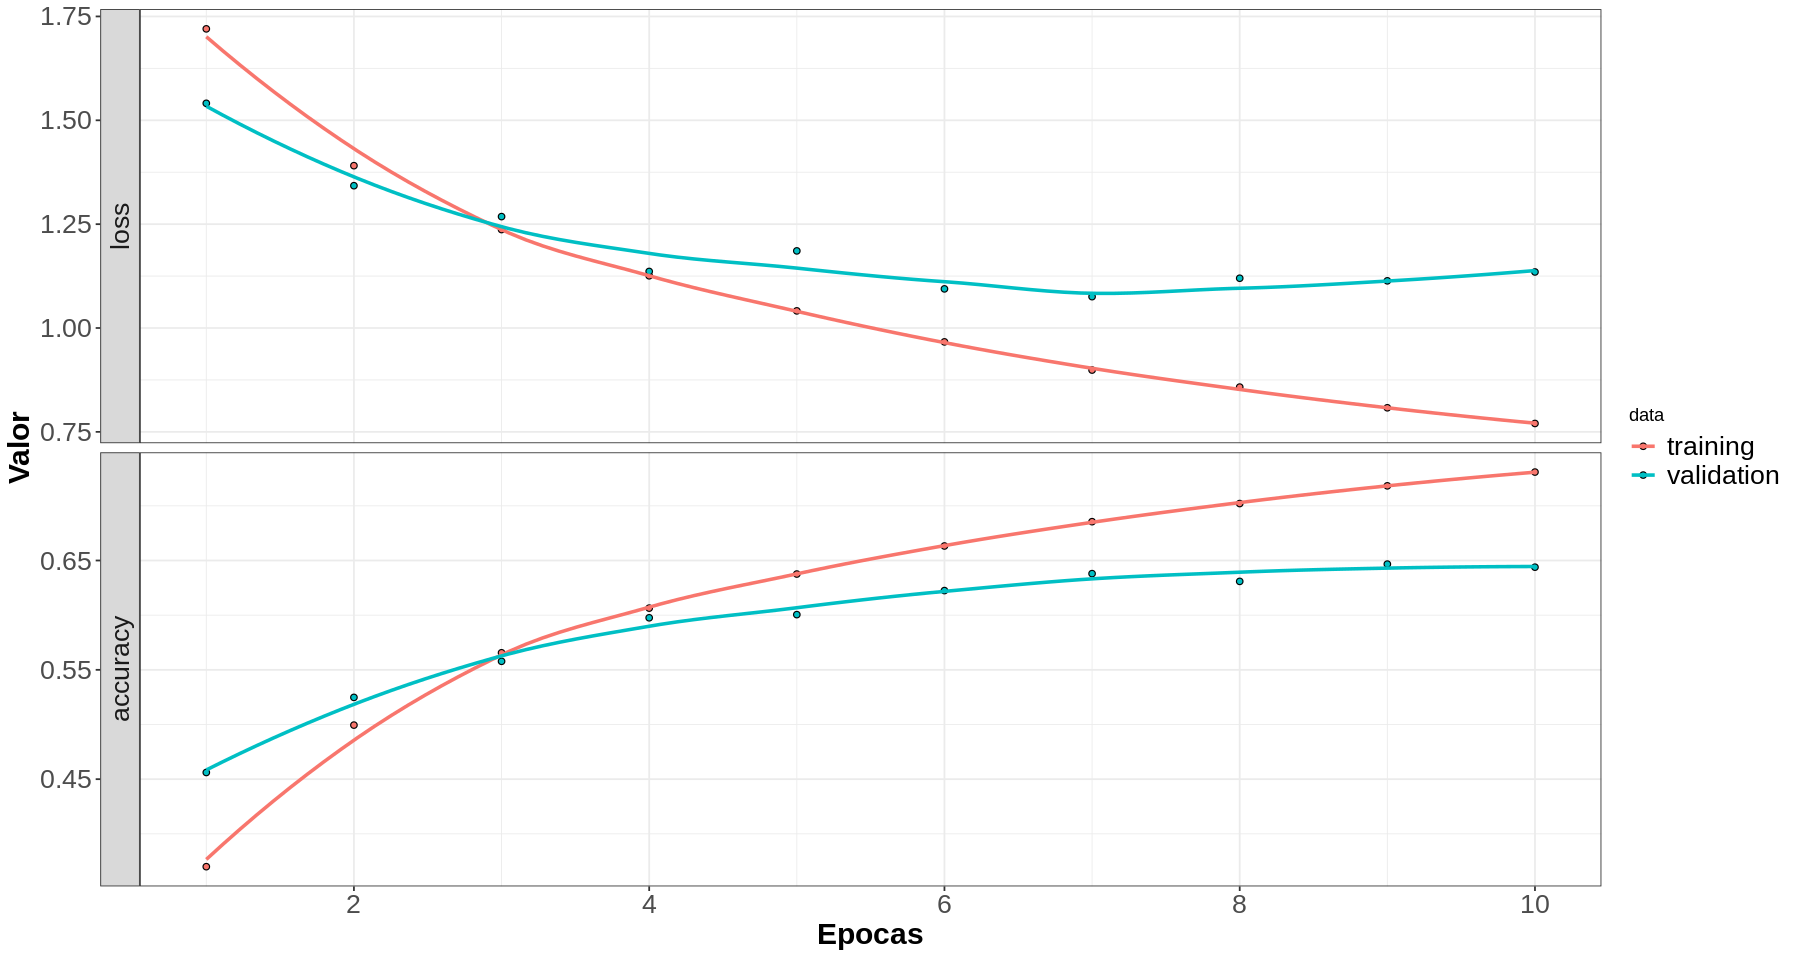

In [23]:
options(repr.plot.width=15, repr.plot.height=8)
g = plot(history) + theme_bw() + xlab("Epocas") + ylab("Valor")
g = g + theme(axis.text=element_text(size=16),
        axis.title=element_text(size=18,face="bold"),
        legend.text=element_text(size=16),
        strip.text = element_text(size = 16))

g

# 5. Realizando predições com o modelo obtido

Tendo o modelo induzido, por meio do treinamento do algoritmo, vamos agora realizar as predições no conjunto de teste, não usado até então.

Podemos também analisar o desempenho do algoritmo no conjunto de treinamento, para fins didáticos. Abaixo, verificamos primeiro a matriz de confusão com as predições obtidas. Os números que compõem a diagnoal principal são os exemplos que foram corretamente rotulado.

In [26]:
# realizando as predicoes no conjunto de teste, só para checagem
# pred = model %>% predict_classes(cifar$train$x)
pred = model %>% predict(cifar$train$x) %>% k_argmax()
print(pred)
# calculando a matriz de confusão


tf.Tensor([6 9 0 ... 9 1 1], shape=(50000,), dtype=int64)


In [27]:
class(pred)

[1] "tensorflow.tensor"                               
[2] "tensorflow.python.framework.ops.EagerTensor"     
[3] "tensorflow.python.framework.ops._EagerTensorBase"
[4] "tensorflow.python.framework.ops.Tensor"          
[5] "tensorflow.python.types.internal.NativeObject"   
[6] "tensorflow.python.types.core.Tensor"             
[7] "python.builtin.object"

In [32]:
# matriz de confusão
tab1 = table(Predicted=as.numeric(pred), Actual=cifar$train$y)
print(tab1)

         Actual
Predicted    0    1    2    3    4    5    6    7    8    9
        0 4318  114  523  276  273  132   96  172  400  338
        1   77 4609   62   71   30   62   66   47  179  549
        2   79    2 3028  319  176  288  160   91   22   21
        3   11    8  105 2250   91  516  123   43    8   10
        4   68   13  658  510 3956  370  331  428   19   32
        5    8    2  165  645   68 3055   53  176    3    6
        6    9   11  224  407  150  171 4051   16   11   11
        7   19    1   89  147  159  222   19 3917    3   43
        8  328   73  100  257   75  111   60   46 4290  116
        9   83  167   46  118   22   73   41   64   65 3874


A partir da matriz de confusão conseguimos mensurar a **acurácia** do modelo - numero de acertos/numero de exemplos. O número de acertos é obtido pela soma dos elementos da diagonal principal da matriz. E o número de elemento, sabemos tanto pelo conjunto de teste, como o somatório de todos os elementos da matriz de confusão. Assim, a acurácia do nosso modelo seria:

In [33]:
acc = sum(diag(tab1))/sum(tab1)
cat("Acurácia do modelo = ", acc, "\n")

Acurácia do modelo =  0.74696 


E, as vezes também é interessante visualizar as predições para cada amostra/exemplo a fim de identificar potenciais erros ou rúidos que podem ser trabalhados para melhorar o desempenho do modelo induzido. Abaixo, executamos alguns comandos para ver qual é a probabilidade de um exemplo pertencer a qualquer uma das 10 classes. As duas últimas colunas indicam o valor predito (Predicted) e o valor real esperado (Truth) que será o label correto para aquele exemplo.

In [39]:
# obtendo as predicoes, mas em termos de probabilidades
prob = model %>% predict(cifar$train$x)
head(prob)

1.875375e-03,1.007453e-03,4.769014e-02,2.697729e-01,1.741889e-03,1.762227e-01,4.725185e-01,2.239817e-02,1.521602e-03,5.251229e-03
6.789158e-02,1.287855e-03,5.640048e-03,3.403759e-05,1.049352e-04,1.158696e-03,4.570034e-06,1.652199e-02,4.427995e-02,8.630763e-01
8.605458e-01,7.253228e-03,5.823468e-04,1.685361e-03,1.166563e-03,2.452121e-04,5.019935e-05,9.195187e-03,1.012147e-02,1.091545e-01
5.393038e-04,6.128928e-05,8.391829e-03,1.903627e-03,9.598836e-01,1.542553e-02,7.959027e-03,5.698632e-03,5.577284e-06,1.315803e-04
2.668497e-09,9.999907e-01,1.074780e-14,6.100407e-15,5.763180e-16,4.797882e-15,2.332387e-14,1.529452e-12,2.000304e-10,9.257838e-06
1.625801e-02,8.569111e-01,3.758898e-06,1.447667e-05,1.789617e-05,8.394125e-05,6.345712e-07,4.963741e-03,3.228741e-03,1.185175e-01


In [40]:
df = cbind(prob, Predicted_class = as.numeric(pred), Actual=cifar$train$y)
head(df)

,,,,,,,,,,Predicted_class,
1.875375e-03,1.007453e-03,4.769014e-02,2.697729e-01,1.741889e-03,1.762227e-01,4.725185e-01,2.239817e-02,1.521602e-03,5.251229e-03,6,6
6.789158e-02,1.287855e-03,5.640048e-03,3.403759e-05,1.049352e-04,1.158696e-03,4.570034e-06,1.652199e-02,4.427995e-02,8.630763e-01,9,9
8.605458e-01,7.253228e-03,5.823468e-04,1.685361e-03,1.166563e-03,2.452121e-04,5.019935e-05,9.195187e-03,1.012147e-02,1.091545e-01,0,9
5.393038e-04,6.128928e-05,8.391829e-03,1.903627e-03,9.598836e-01,1.542553e-02,7.959027e-03,5.698632e-03,5.577284e-06,1.315803e-04,4,4
2.668497e-09,9.999907e-01,1.074780e-14,6.100407e-15,5.763180e-16,4.797882e-15,2.332387e-14,1.529452e-12,2.000304e-10,9.257838e-06,1,1
1.625801e-02,8.569111e-01,3.758898e-06,1.447667e-05,1.789617e-05,8.394125e-05,6.345712e-07,4.963741e-03,3.228741e-03,1.185175e-01,1,1


In [41]:
# verificando as predicoes, em termos de probabilidades para cada um dos exemplos
colnames(df)[1:10] = paste("Prob", class_names, sep=".")
colnames(df)[11:12] = c("Predicted", "Truth")
head(round(df, 5))

Prob.airplane,Prob.automobile,Prob.bird,Prob.cat,Prob.deer,Prob.dog,Prob.frog,Prob.horse,Prob.ship,Prob.truck,Predicted,Truth
0.00188,0.00101,0.04769,0.26977,0.00174,0.17622,0.47252,0.02240,0.00152,0.00525,6,6
0.06789,0.00129,0.00564,0.00003,0.00010,0.00116,0.00000,0.01652,0.04428,0.86308,9,9
0.86055,0.00725,0.00058,0.00169,0.00117,0.00025,0.00005,0.00920,0.01012,0.10915,0,9
0.00054,0.00006,0.00839,0.00190,0.95988,0.01543,0.00796,0.00570,0.00001,0.00013,4,4
0.00000,0.99999,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,1,1
0.01626,0.85691,0.00000,0.00001,0.00002,0.00008,0.00000,0.00496,0.00323,0.11852,1,1


Entretanto, o mais interessante aqui é avaliar o modelo induzido no **conjunto de teste**. Assim, repetimos os passos descrito acima para ```cifar$test```:
* matriz de confusão das predições;
* acurácia geral do modelo
* predições individuais com a probabilidade de cada classe.


In [42]:
evaluate(model, cifar$test$x, cifar$test$y, verbose = 0)

loss accuracy 
1.134895 0.643900

In [43]:
pred_test = model %>% predict(cifar$test$x) %>% k_argmax()
tab = table(Predicted = as.numeric(pred_test), Actual = cifar$test$y)
print(tab)

         Actual
Predicted   0   1   2   3   4   5   6   7   8   9
        0 763  34 124  74  55  45  20  55 131  96
        1  26 833  15  19   8  14  13  17  51 149
        2  38   3 480  76  60  80  52  39  13   6
        3   8   2  45 323  35 118  45  25   3   4
        4  19   7 148 122 668  77  90 103   7   7
        5   3   2  54 154  25 519  16  59   0   3
        6   4   6  68  99  57  50 732   8   4   6
        7   8   1  31  46  61  55   6 667   4  13
        8 108  24  23  52  27  27  17   8 772  34
        9  23  88  12  35   4  15   9  19  15 682


In [44]:
acc = sum(diag(tab))/sum(tab)
cat("Acurácia do modelo = ", acc, "\n")

Acurácia do modelo =  0.6439 


In [47]:
prob2 = model %>% predict(cifar$test$x)
head(prob2)

0.0283486135,4.541481e-03,7.886903e-03,5.065997e-01,1.547674e-03,6.913076e-02,3.533709e-01,1.086279e-03,1.807108e-02,9.416588e-03
0.0006636724,2.336189e-03,1.144043e-07,4.314585e-08,1.342717e-10,1.143813e-09,6.663835e-12,6.334412e-10,9.967889e-01,2.111595e-04
0.1196672246,1.636977e-01,1.802440e-03,1.501457e-03,1.143990e-04,2.528387e-04,9.379801e-04,1.487671e-03,6.972429e-01,1.329545e-02
0.7434191108,1.138767e-01,7.335555e-04,1.631956e-04,1.034237e-05,1.625780e-06,1.275167e-04,6.981508e-06,1.412298e-01,4.311766e-04
0.0002077127,5.805092e-06,6.531436e-02,1.886319e-02,8.450933e-01,5.731686e-03,6.435698e-02,4.173264e-04,6.859239e-07,8.991969e-06
0.0038637761,2.451325e-02,2.293889e-02,4.787405e-03,1.419842e-02,1.350513e-02,8.929076e-01,3.214262e-03,3.940875e-04,1.967723e-02


In [48]:
df2 = cbind(prob2, Predicted_class = as.numeric(pred_test), Actual=cifar$test$y)
# verificando as predicoes, em termos de probabilidades para cada um dos exemplos
colnames(df2)[1:10] = paste("Prob", class_names, sep=".")
colnames(df2)[11:12] = c("Predicted", "Truth")
head(round(df2, 5))

Prob.airplane,Prob.automobile,Prob.bird,Prob.cat,Prob.deer,Prob.dog,Prob.frog,Prob.horse,Prob.ship,Prob.truck,Predicted,Truth
0.02835,0.00454,0.00789,0.50660,0.00155,0.06913,0.35337,0.00109,0.01807,0.00942,3,3
0.00066,0.00234,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.99679,0.00021,8,8
0.11967,0.16370,0.00180,0.00150,0.00011,0.00025,0.00094,0.00149,0.69724,0.01330,8,8
0.74342,0.11388,0.00073,0.00016,0.00001,0.00000,0.00013,0.00001,0.14123,0.00043,0,0
0.00021,0.00001,0.06531,0.01886,0.84509,0.00573,0.06436,0.00042,0.00000,0.00001,4,6
0.00386,0.02451,0.02294,0.00479,0.01420,0.01351,0.89291,0.00321,0.00039,0.01968,6,6


#6. Síntese e considerações finais

No exemplo aqui demonstrado aplicamos uma CNN para realizar uma tarefa de classificação de imagens. O dataset que exploramos foi o CIFAR-10, com imagens originalmente categorizadas em 10 classes distintas. 

Nosso passo a passo de indução e avaliação de um modelo é feito epxlorando as implementações do keras, bilioteca original do Python, mas com pacote disponível que realiza o interfaceamento com R.

Basicamente seguimos um fluxo padrão de geração/indução de modelo preditivo:
1.  Obtenção dos dados (CIFAR-10);
2.  Separação dos dados entre conjuntos de treino e teste (```cifar$train``` e ```cifar$test```);
3.  Criação de um modelo inicial com a arquitetura padrão de CNN. Definimos um modelo sequencial (forward) e adicionamos cada uma das camadas da CNN, especificando a quantidade de neurônios, tamanho de possíveis kernels, e os correspondentes tipos de funções de ativação;
4.  Definição dos parâmetros usados no treinamento do algoritmo (algoritmo de otimização/redução do erro, medida reduzida, e medidas de desempenho)
5.  Treinamento e indução do modelo preditivo (```fit```); e
5.  Avaliação do modelo induzido no cojunto de testes (predições e probabilidades).

Por fim, é importante salientar que grande parte dos processos acima descritos são facilitados pelas ferramentas que exploramos (keras). Isso é imprescíndicel para um programador/cientista de dados/pesquisador, pois permite que nos dediquemos ao estudo do problema e das possíveis implicações dos modelos gerados, uma vez que a modelagem/implementação já é fornecida por uma ferramenta robusta. Como diriam alguns professores com que já trabalhei ao longo da vida: 

  "*Não precisamos reinventar a roda, mas saber usar o que já existe e expandir a fronteira do conhecimento*.

Bons estudos :)
